In [71]:
# 📓 07_class_imbalance.ipynb

# === 1. Setup ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

sys.path.append(os.path.abspath("../"))
from src.config import FRAUD_CLEANED_PATH
from src.utils import load_csv

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

sns.set(style="whitegrid")

# === 2. Load Cleaned Dataset ===
df = load_csv(FRAUD_CLEANED_PATH)


[INFO] Loaded data: C:\Users\yitbie\Desktop\10A\project\fraud-detection-project\data\processed\fraud_cleaned.csv | Shape: (151112, 19)


In [72]:
# Create directory if it doesn't exist
FIG_DIR = os.path.abspath("../reports/figures/fraud_fig/")
os.makedirs(FIG_DIR, exist_ok=True)

def save_plot(fig, filename):
    path = os.path.join(FIG_DIR, filename)
    fig.savefig(path, bbox_inches='tight')
    print(f"Saved: {path}")

Saved: C:\Users\yitbie\Desktop\10A\project\fraud-detection-project\reports\figures\fraud_fig\original_class_dist.png


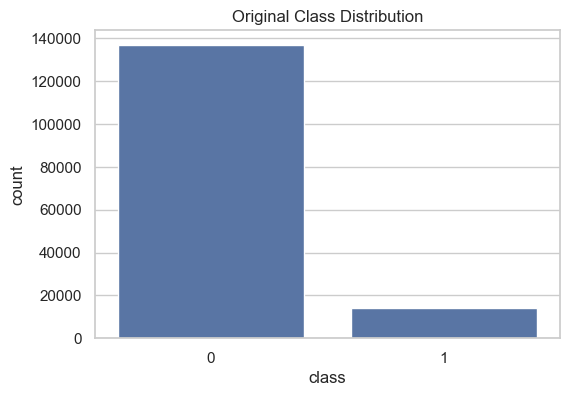

 Fraud Ratio: 9.3646%


In [73]:
# Check target class
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x='class', data=df, ax=ax)
ax.set_title("Original Class Distribution")
save_plot(fig, "original_class_dist.png")
plt.show()

# Show fraud ratio
fraud_ratio = df['class'].mean()
print(f" Fraud Ratio: {fraud_ratio:.4%}")


In [74]:
# Keep only numeric columns for SMOTE
X_numeric = X_train.select_dtypes(include=['int64', 'float64', 'uint32'])

print(" Columns used for SMOTE:", X_numeric.columns.tolist())

 Columns used for SMOTE: ['user_id', 'purchase_value', 'age', 'ip_address', 'ip_int', 'hour_of_day', 'day_of_week', 'time_since_signup', 'user_tx_count', 'device_tx_count', 'ip_tx_count']


Saved: C:\Users\yitbie\Desktop\10A\project\fraud-detection-project\reports\figures\fraud_fig\class_distr_after_SMOTE.png


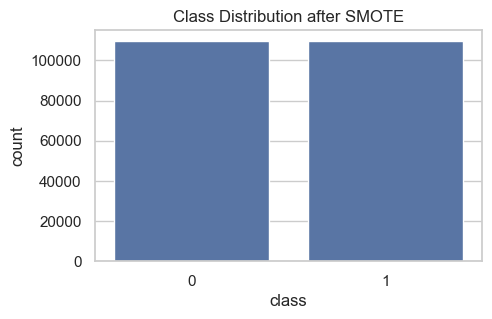

In [75]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_numeric, y_train)

fig, ax = plt.subplots(figsize=(5, 3))
sns.countplot(x=y_smote, ax=ax)
ax.set_title("Class Distribution after SMOTE")
save_plot(fig, "class_distr_after_SMOTE.png")
plt.show()


Saved: C:\Users\yitbie\Desktop\10A\project\fraud-detection-project\reports\figures\fraud_fig\class_distr_after_Undersampling.png


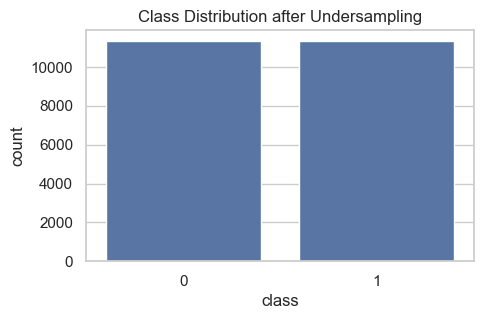

In [76]:
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X_numeric, y_train)

fig, ax = plt.subplots(figsize=(5, 3))
sns.countplot(x=y_under, ax=ax)
ax.set_title("Class Distribution after Undersampling")
save_plot(fig, "class_distr_after_Undersampling.png")
plt.show()


In [77]:
# Save versions for modeling
X_smote['class'] = y_smote
X_under['class'] = y_under

X_smote.to_csv("../data/processed/train_balanced_smote.csv", index=False)
X_under.to_csv("../data/processed/train_balanced_under.csv", index=False)

print(" Saved balanced datasets.")


 Saved balanced datasets.


In [78]:
check = pd.read_csv(out_path)
print(" Reloaded shape:", check.shape)
print(" Class distribution:\n", check['class'].value_counts(normalize=True))


 Reloaded shape: (219136, 12)
 Class distribution:
 class
0    0.5
1    0.5
Name: proportion, dtype: float64
